In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.803861504778
[[ 127.45096999   97.43995344    0.            0.          178.05699009
   -29.04249393   -3.45455885    0.           66.17781429  -32.86167732]]


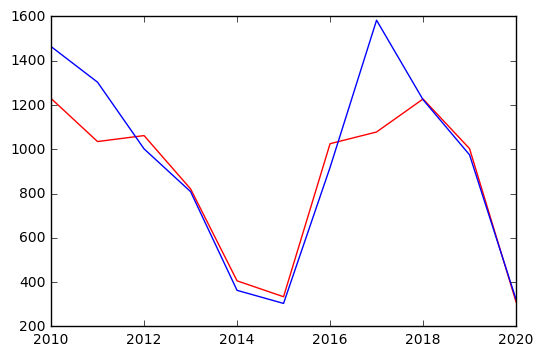

In [2]:
# Read data
data = pd.read_csv("AK.csv")
year1 = data[['Year']][:44]
year2 = data[['Year']][-11:]

#Data Preprocessing
data['GDP_scaled']=preprocessing.scale(data['GDP'])
data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
data['PCP_scaled']=preprocessing.scale(data['PCP'])
data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

# Split data for train and test
all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
all_y = data[['HYTCP']][:55]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

# SVR for hydro in CA
clf = SVR(kernel='linear', C=20.0, epsilon=0.3).fit(X_train, y_train)

print(clf.score(X_test, y_test))
print(clf.coef_)
#print(clf.class_weight)
plt.plot(year2, clf.predict(X_test), color='red')
plt.plot(year2, y_test)
plt.show()